In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import seaborn as sns
sns.set(style="darkgrid")
from scipy import stats
import matplotlib.patches as mpatches

In [2]:
estimation_window = 100
event_window = 100

In [3]:
date_split_value = pd.datetime(1995, 1, 1) # ignore values before 1995

In [4]:
ford_stock_data_types = {
    'Date': str,
    'Price': float
}
ford_stock = pd.read_csv('zstock_data_clean/ford_stock.txt', sep='\t', parse_dates=['Date'])

In [5]:
ford_stock_after_1995 = ford_stock.loc[ford_stock['Date'] > date_split_value]

In [6]:
ford_stock_after_1995_reset_indices = ford_stock_after_1995.reset_index()
ford_stock_after_1995_reset_indices.drop('index', axis=1, inplace=True)
ford_stock_after_1995_reset_indices.head()

,Date,Price
0,1995-01-03,5.291710
1,1995-01-04,5.434087
2,1995-01-05,5.386628
3,1995-01-06,5.386628
4,1995-01-09,5.481547


In [7]:
import random as random

In [8]:
def generate_random_dates(number_of_random_numbers):
    number_of_random_numbers = 30
    randoms = set()
    for i in range(0, number_of_random_numbers):
        r = random.randrange(0, len(ford_stock_after_1995_reset_indices))
        while r < event_window or r > len(ford_stock_after_1995_reset_indices) - event_window:
            r = random.randrange(0, len(ford_stock_after_1995_reset_indices))
        randoms.add(r)
    random_dates_series = ford_stock_after_1995_reset_indices['Date'][randoms]
    random_dates = [np.datetime64(the_date) for the_date in list(random_dates_series)]
    random_dates = np.array(random_dates)
    return random_dates

In [84]:
"""number_of_random_numbers = 30
randoms = set()
for i in range(0, number_of_random_numbers):
    r = random.randrange(0, len(ford_stock_after_1995_reset_indices))
    while r < event_window or r > len(ford_stock_after_1995_reset_indices) - event_window:
        r = random.randrange(0, len(ford_stock_after_1995_reset_indices))
    randoms.add(r)"""

'number_of_random_numbers = 30\nrandoms = set()\nfor i in range(0, number_of_random_numbers):\n    r = random.randrange(0, len(ford_stock_after_1995_reset_indices))\n    while r < event_window or r > len(ford_stock_after_1995_reset_indices) - event_window:\n        r = random.randrange(0, len(ford_stock_after_1995_reset_indices))\n    randoms.add(r)'

In [85]:
"""random_dates_series = ford_stock_after_1995_reset_indices['Date'][randoms]
random_dates = [np.datetime64(the_date) for the_date in list(random_dates_series)]
random_dates = np.array(random_dates)"""

"random_dates_series = ford_stock_after_1995_reset_indices['Date'][randoms]\nrandom_dates = [np.datetime64(the_date) for the_date in list(random_dates_series)]\nrandom_dates = np.array(random_dates)"

In [29]:
n_random_numbers = 30
random_dates = generate_random_dates(n_random_numbers)

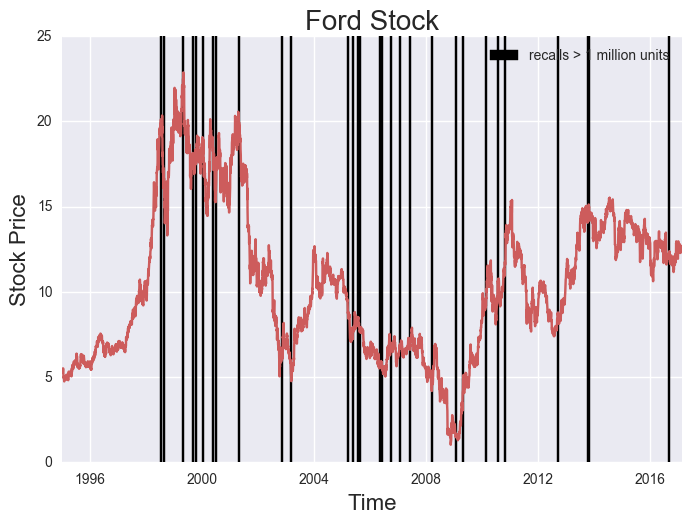

In [30]:
plt.plot(list(ford_stock_after_1995['Date']), list(ford_stock_after_1995['Price']), c='indianred')
plt.vlines(x=random_dates, ymin=[0 for x in range(0, len(random_dates))], ymax=[25 for x in range(0, len(random_dates))])
plt.title('Ford Stock', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Stock Price', fontsize=16)
black_patch = mpatches.Patch(color='black', label='recalls > 1 million units')
plt.legend(handles=[black_patch],
           loc='upper right')
plt.show()

In [31]:
# now we will conduct the event study
dates_arr = np.array(ford_stock_after_1995_reset_indices['Date'])
prices_arr = np.array(ford_stock_after_1995_reset_indices['Price'])

In [32]:
len(random_dates)

30

In [33]:
random_dates

array(['1998-07-14T00:00:00.000000', '2013-10-30T00:00:00.000000',
       '2003-03-04T00:00:00.000000', '2005-03-21T00:00:00.000000',
       '2010-10-25T00:00:00.000000', '2006-10-05T00:00:00.000000',
       '2009-04-27T00:00:00.000000', '1998-08-25T00:00:00.000000',
       '1999-09-07T00:00:00.000000', '2006-05-10T00:00:00.000000',
       '2005-05-20T00:00:00.000000', '2006-05-31T00:00:00.000000',
       '1999-10-18T00:00:00.000000', '2007-06-08T00:00:00.000000',
       '1999-04-22T00:00:00.000000', '2001-05-02T00:00:00.000000',
       '2002-11-15T00:00:00.000000', '2000-05-18T00:00:00.000000',
       '2016-09-01T00:00:00.000000', '2010-07-29T00:00:00.000000',
       '2009-01-27T00:00:00.000000', '2007-02-01T00:00:00.000000',
       '2010-02-25T00:00:00.000000', '2005-08-01T00:00:00.000000',
       '2012-09-12T00:00:00.000000', '2000-06-29T00:00:00.000000',
       '2000-01-10T00:00:00.000000', '2005-08-18T00:00:00.000000',
       '2008-03-14T00:00:00.000000', '2013-10-21T00:00:00.0000

In [34]:
import event_study.event_study as evt

In [35]:
t_statistic, stdev, caar, car, abnormal_returns, bases = evt.event_study(stock_date_data=dates_arr,
                                                                           stock_price_data=prices_arr,
                                                                           event_dates=random_dates,
                                                                           estimation_window=estimation_window,
                                                                           event_window=event_window)
print("t stat:", t_statistic)
print("stdev: ", stdev)

t stat: 0.498992531403
stdev:  0.481596453312


In [41]:
def simulate_event_study(num_simulations):
    t_statistics = []
    p_values = []
    for i in range(0, num_simulations):
        random_dates = generate_random_dates(30)
        t_stat, stdev, caar, car, abnormal_returns, bases = evt.event_study(stock_date_data=dates_arr,
                                                                               stock_price_data=prices_arr,
                                                                               event_dates=random_dates,
                                                                               estimation_window=estimation_window,
                                                                               event_window=event_window)
        t_statistics.append(t_stat)
        p_value = stats.t.cdf(x=t_stat, df=len(random_dates)-1)
        p_values.append(p_value)
    return t_statistics, p_values

In [42]:
import scipy.stats as stats

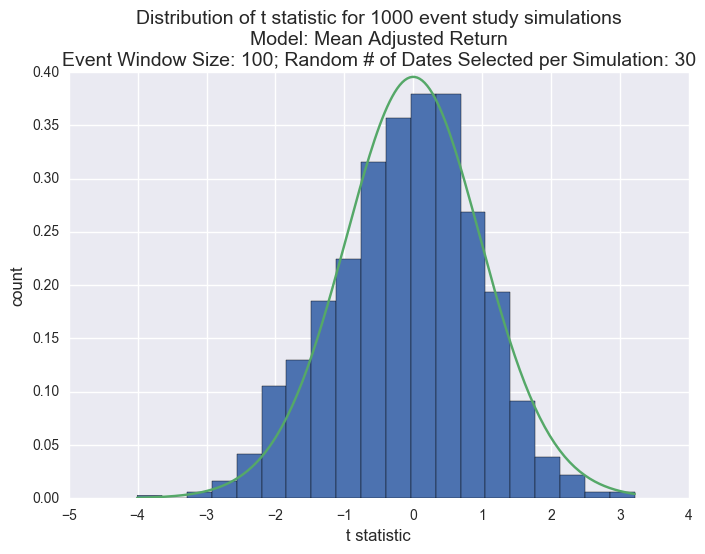

In [57]:
# simulate the t statistic
n_simulations = 1000
t_stats, p_vals = simulate_event_study(n_simulations)
plt.hist(t_stats, bins=20, normed=True)

DoF = len(random_dates) - 1
x = np.linspace(min(t_stats), max(t_stats), 200)
y = stats.t.pdf(x, DoF)

plt.plot(x, y)
plt.title('Distribution of t statistic for {:d} event study simulations\nModel: Mean Adjusted Return\nEvent Window Size: {:2d}; Random # of Dates Selected per Simulation: {:d}'.format(n_simulations, event_window, len(random_dates)), fontsize=18)
plt.ylabel('count', fontsize=16)
plt.xlabel('t statistic', fontsize=16)
plt.show()

In [44]:
sorted_t_statistics = sorted(t_stats)
n_elems_less_than_t_stat = len([x for x in sorted_t_statistics if x < t_statistic])
pr_less_than_t_stat = n_elems_less_than_t_stat / n_simulations
pr_less_than_t_stat

0.705

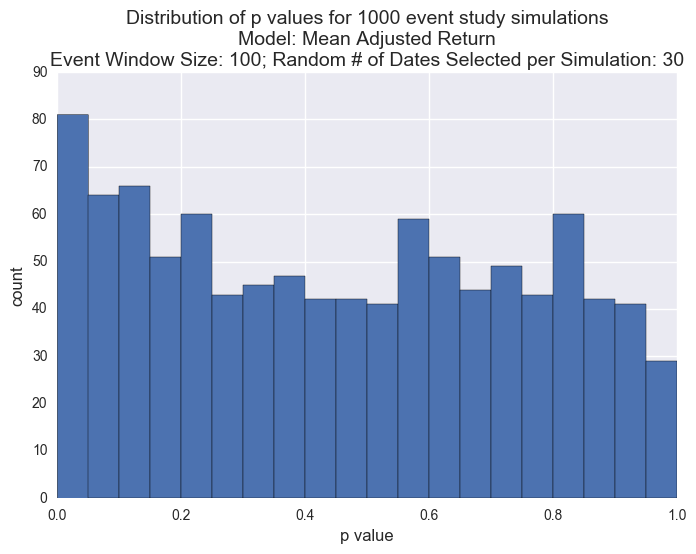

In [48]:
# simulate the p values
n_simulations = 1000
t_stats, p_vals = simulate_event_study(n_simulations)
plt.hist(p_vals, bins=20)
plt.title('Distribution of p values for {:d} event study simulations\nModel: Mean Adjusted Return\nEvent Window Size: {:2d}; Random # of Dates Selected per Simulation: {:d}'.format(n_simulations, event_window, len(random_dates)), fontsize=14)
plt.ylabel('count', fontsize=12)
plt.xlabel('p value', fontsize=12)
plt.show()

In [21]:
stats.t.cdf(x=t_statistic,      # T-test statistic
            df=len(random_dates))

0.36104051331463871

In [113]:
est_windows, evt_windows, indices = evt.calculate_estimation_and_event_windows(_stock_date_data=dates_arr,
                                                       _stock_price_data=prices_arr,
                                                       _event_dates=recalls_dates_arr,
                                                       _estimation_window=estimation_window,
                                                       _event_window=event_window)

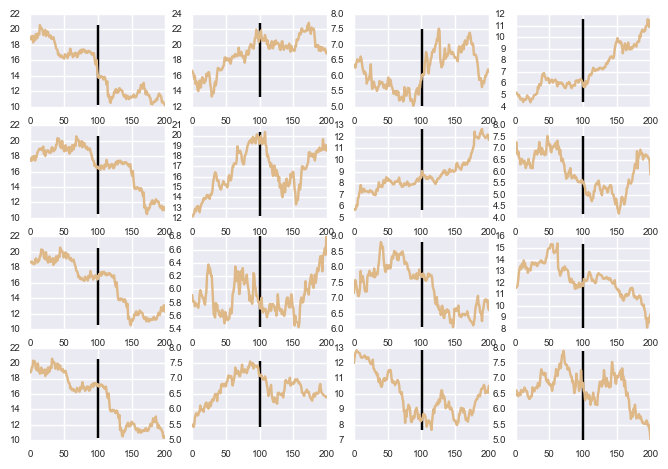

In [121]:
num_cols = 4
num_rows = 4
f, axarr = plt.subplots(num_rows, num_cols)
ith_period = 0

for col in range(0, num_cols):
    for row in range(0, num_rows):
        x1 = []
        x1.extend(est_windows[ith_period])
        x1.append(prices_arr[indices[ith_period]])
        x1.extend(evt_windows[ith_period])
        axarr[row, col].plot(x1, c='burlywood')
        axarr[row, col].vlines(x=len(x1)/2, ymin=min(x1), ymax=max(x1))
        axarr[row, col].tick_params(labelsize=7)
        ith_period += 1
plt.show()

In [62]:
len(car)

17